Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [6]:
NAME = ""
COLLABORATORS = ""

---

# Интерполяция при помощи полиномов Лагранжа.

In [11]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        # YOUR CODE HERE
        # yk — имеем
        # lk — посчитаем
        m = len(self.xk)
        X = self.xk
        Y = self.yk
        L = []

        for k in range(m):
            lk = 1
            for j in range(m):
                if j == k: continue
                
                lk *= (x - X[j]) / (X[k] - X[j])
            
            L.append(lk)
        L = np.array(L)
        
        return np.dot(L, Y)
        
        raise NotImplementedError()

In [30]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


In [13]:
# YOUR CODE AND COMMENTS HERE (5 pts, manually graded)

In [15]:
from matplotlib import pyplot as plt

In [79]:
M = [3, 5, 7, 11]

In [87]:
runge_interpolators = []

for m in M:
    X = np.linspace(-2, 2, m)
    Y = runge_func(X)
    interpolator = LagrangeInterpolator(X, Y)
    runge_interpolators.append(interpolator)

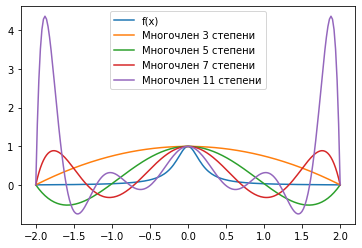

In [88]:
X = np.linspace(-2, 2, 200)
plt.plot(X, runge_func(X), label = 'f(x)')

i = 0
for interpolator in runge_interpolators:
    plt.plot(X, [interpolator(x) for x in X], label=f'Многочлен {M[i]} степени')
    i += 1
plt.legend()

In [89]:
def get_chebyshev_nodes(a, b, n):
    x = np.zeros(n)
    for k in range(n):
        x[k] = 1/2*(a + b) + 1/2*(b - a)*np.cos(np.pi*2*k/(2 * n))
    return x

In [90]:
runge_interpolators = []

for m in M:
    X = get_chebyshev_nodes(-2, 2, m)
    Y = runge_func(X)
    interpolator = LagrangeInterpolator(X, Y)
    runge_interpolators.append(interpolator)

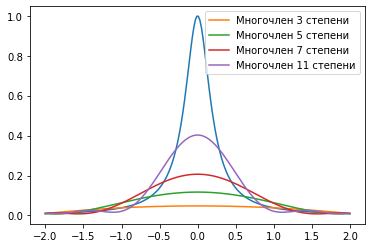

In [91]:
X = np.linspace(-2, 2, 200)
plt.plot(X, runge_func(X))

i = 0
for interpolator in runge_interpolators:
    plt.plot(X, [interpolator(x) for x in X], label=f'Многочлен {M[i]} степени')
    i += 1
plt.legend()

Видим сильное улучшение качества при интерполяции в узлах Чебышева по сравнению с равномерной сеткой